<a href="https://colab.research.google.com/github/lucasquemelli/Star_Jeans/blob/main/star_jeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

from scipy import stats
from matplotlib import pyplot as plt
from matplotlib import gridspec

# 1. Exploratory Data Analysis (EDA)

Firstly, we planned to scrape data from H&M and Macys. However, we found many websites with denied access to their data - Macys was one of them. Thus, we decided to use data from True Religion website instead of Macys. Although we could collect some data, yet it was not possible to collect everything we wanted due to permissions and website layout (that limits scraping). 

In [2]:
url01 = 'https://raw.githubusercontent.com/lucasquemelli/ds_ao_dev/main/data_clean.csv'
df01 = pd.read_csv(url01)
df01.head()

,Unnamed: 0,product_id,fit,color,product_name,product_price,style_id,color_id,scrape_datetime,cotton,polyester,spandex,lyocell,rayon,elastomultiester,model_size,jeans_size
0,0,1100162003,regular_fit,denim_gray,essentials_no_2_the_jeans,39.99,1100162,3,2022-11-07 11:20:15,0.99,0.65,0.01,0.0,0.0,0.0,187.0,31/32
1,1,1100162003,regular_fit,denim_gray,NaN,NaN,1100162,3,2022-11-07 11:20:15,0.99,0.65,0.01,0.0,0.0,0.0,187.0,31/32
2,2,1100162002,regular_fit,denim_blue,essentials_no_2_the_jeans,39.99,1100162,2,2022-11-07 11:20:15,0.99,0.65,0.01,0.0,0.0,0.0,189.0,31/32
3,3,1100162002,regular_fit,denim_blue,NaN,NaN,1100162,2,2022-11-07 11:20:15,0.99,0.65,0.01,0.0,0.0,0.0,189.0,31/32
4,4,1024256001,slim_fit,black,slim_jeans,19.99,1024256,1,2022-11-07 11:20:15,0.99,0.65,0.01,0.0,0.0,0.0,185.0,31/32


In [3]:
url02 = 'https://raw.githubusercontent.com/lucasquemelli/ds_ao_dev/main/truereligion_clean.csv'
df02 = pd.read_csv(url02)
df02.head()

,Unnamed: 0,product_id,product_name,product_price,scrape_datetime
0,0,194922694017,rocco_skinny_jean,49.0,2022-12-05 09:41:26
1,1,194922794977,ricky_straight_jean,49.0,2022-12-05 09:41:26
2,2,194922702125,geno_slim_jean,49.0,2022-12-05 09:41:26
3,3,194922694338,ricky_straight_jean,49.0,2022-12-05 09:41:26
4,4,194922795424,rocco_skinny_jean,49.0,2022-12-05 09:41:26


## 1.1. Data Description

### 1.1.1. H&M

#### 1.1.1.1. Data shape and types

In [4]:
print("Number of rows: {}".format(df01.shape[0]))
print("Number of cols: {}".format(df01.shape[1]))

Number of rows: 128
Number of cols: 17


In [5]:
df01.dtypes

Unnamed: 0            int64
product_id            int64
fit                  object
color                object
product_name         object
product_price       float64
style_id              int64
color_id              int64
scrape_datetime      object
cotton              float64
polyester           float64
spandex             float64
lyocell             float64
rayon               float64
elastomultiester    float64
model_size          float64
jeans_size           object
dtype: object

In [6]:
df01 = df01.drop(columns=['Unnamed: 0']).reset_index(drop=True)

In [7]:
df01['scrape_datetime'] = pd.to_datetime(df01['scrape_datetime']) 

In [8]:
df01.dtypes

product_id                   int64
fit                         object
color                       object
product_name                object
product_price              float64
style_id                     int64
color_id                     int64
scrape_datetime     datetime64[ns]
cotton                     float64
polyester                  float64
spandex                    float64
lyocell                    float64
rayon                      float64
elastomultiester           float64
model_size                 float64
jeans_size                  object
dtype: object

#### 1.1.1.2. Missing values

In [9]:
df01.isna()

,product_id,fit,color,product_name,product_price,style_id,color_id,scrape_datetime,cotton,polyester,spandex,lyocell,rayon,elastomultiester,model_size,jeans_size
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
124,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,True
125,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
126,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df01.isna().sum()

product_id           0
fit                  0
color                0
product_name        56
product_price       56
style_id             0
color_id             0
scrape_datetime      0
cotton               0
polyester            0
spandex              0
lyocell              0
rayon                0
elastomultiester     0
model_size          39
jeans_size          45
dtype: int64

In [11]:
df01.isna().sum()/df01.shape[0]

product_id          0.000000
fit                 0.000000
color               0.000000
product_name        0.437500
product_price       0.437500
style_id            0.000000
color_id            0.000000
scrape_datetime     0.000000
cotton              0.000000
polyester           0.000000
spandex             0.000000
lyocell             0.000000
rayon               0.000000
elastomultiester    0.000000
model_size          0.304688
jeans_size          0.351562
dtype: float64

In [12]:
df_aux01 = df01.dropna()
df_aux01.shape

(44, 16)

Deleting the missing values would result in a very large impact on the dataframe. As the H&M website's HTML changes daily, it would also not be feasible to collect more data automatically every day.

The solution I propose is not to use the column of product_name, model_size and jeans_size. For product_price, check the price grouping by product_id and if it doesn't vary too much assign the price values to the missing values within the same product_id.

#### 1.1.1.3. Missing values replacement

In [13]:
df01[['product_id', 'product_price']].sort_values('product_id', ascending=True).groupby('product_id').head()

,product_id,product_price
35,690449022,NaN
34,690449022,39.99
25,690449036,39.99
50,690449051,39.99
63,690449056,39.99
...,...,...
1,1100162003,NaN
90,1107750001,44.99
91,1107750001,NaN
126,1114023003,44.99


In [14]:
# Attributing 0 for Na value
for i in range(len(df01)):
    if df01.loc[i, 'product_price'] > 0:
        df01.loc[i, 'product_price'] = df01.loc[i, 'product_price']
    
    else:
        df01.loc[i, 'product_price'] = 0

# Creating an auxiliar dataframe with the maximum values for each product_id only
df_aux = df01[['product_id', 'product_price']].groupby('product_id').max().reset_index()  

# Including the column created above into the dataframe we want
df01_clean = pd.merge(df01, df_aux, on='product_id', how='left')

# Deleting the previous price column and renaming the current price column
df01_clean = df01_clean.drop(columns=['product_price_x'])
df01_clean.rename(columns={'product_price_y':'product_price'}, inplace=True)

df01_clean.head()

,product_id,fit,color,product_name,style_id,color_id,scrape_datetime,cotton,polyester,spandex,lyocell,rayon,elastomultiester,model_size,jeans_size,product_price
0,1100162003,regular_fit,denim_gray,essentials_no_2_the_jeans,1100162,3,2022-11-07 11:20:15,0.99,0.65,0.01,0.0,0.0,0.0,187.0,31/32,39.99
1,1100162003,regular_fit,denim_gray,NaN,1100162,3,2022-11-07 11:20:15,0.99,0.65,0.01,0.0,0.0,0.0,187.0,31/32,39.99
2,1100162002,regular_fit,denim_blue,essentials_no_2_the_jeans,1100162,2,2022-11-07 11:20:15,0.99,0.65,0.01,0.0,0.0,0.0,189.0,31/32,39.99
3,1100162002,regular_fit,denim_blue,NaN,1100162,2,2022-11-07 11:20:15,0.99,0.65,0.01,0.0,0.0,0.0,189.0,31/32,39.99
4,1024256001,slim_fit,black,slim_jeans,1024256,1,2022-11-07 11:20:15,0.99,0.65,0.01,0.0,0.0,0.0,185.0,31/32,19.99


In [15]:
df01_clean = df01_clean.drop(columns=['product_name', 'model_size', 'jeans_size'])
df01_clean.isna().sum()

product_id          0
fit                 0
color               0
style_id            0
color_id            0
scrape_datetime     0
cotton              0
polyester           0
spandex             0
lyocell             0
rayon               0
elastomultiester    0
product_price       0
dtype: int64

#### 1.1.1.4. Data description

#### Numerical data

In [16]:
numerical_attributes = df01_clean.select_dtypes(include=['float64'])
numerical_attributes.head()

,cotton,polyester,spandex,lyocell,rayon,elastomultiester,product_price
0,0.99,0.65,0.01,0.0,0.0,0.0,39.99
1,0.99,0.65,0.01,0.0,0.0,0.0,39.99
2,0.99,0.65,0.01,0.0,0.0,0.0,39.99
3,0.99,0.65,0.01,0.0,0.0,0.0,39.99
4,0.99,0.65,0.01,0.0,0.0,0.0,19.99


In [17]:
numerical_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cotton            128 non-null    float64
 1   polyester         128 non-null    float64
 2   spandex           128 non-null    float64
 3   lyocell           128 non-null    float64
 4   rayon             128 non-null    float64
 5   elastomultiester  128 non-null    float64
 6   product_price     128 non-null    float64
dtypes: float64(7)
memory usage: 8.0 KB


In [18]:
t1 = pd.DataFrame(numerical_attributes.apply( np.mean )).T
t2 = pd.DataFrame(numerical_attributes.apply( np.median )).T

d1 = pd.DataFrame(numerical_attributes.apply( np.std )).T
d2 = pd.DataFrame(numerical_attributes.apply( np.min )).T
d3 = pd.DataFrame(numerical_attributes.apply( np.max )).T
d4 = pd.DataFrame(numerical_attributes.apply( lambda x: x.max() - x.min() )).T # range
d5 = pd.DataFrame(numerical_attributes.apply( lambda x: x.skew() )).T 
d6 = pd.DataFrame(numerical_attributes.apply( lambda x: x.kurtosis() )).T 

m1 = pd.concat([d2, d3, d4, t1, t2, d1, d5, d6]).T.reset_index()
m1.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m1

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,cotton,0.77,1.00,0.23,0.979297,0.995,0.049279,-3.299814,10.234218
1,polyester,0.00,1.00,1.00,0.448672,0.650,0.311690,-0.601429,-1.382646
2,spandex,0.00,0.02,0.02,0.008906,0.010,0.007729,0.192756,-1.309400
3,lyocell,0.00,0.55,0.55,0.017188,0.000,0.095696,5.452262,28.167078
4,rayon,0.00,0.15,0.15,0.004687,0.000,0.026099,5.452262,28.167078
5,elastomultiester,0.00,0.09,0.09,0.005312,0.000,0.020613,3.680787,11.795626
6,product_price,19.99,49.99,30.00,34.325938,39.990,8.578022,-0.101124,-1.018972


**Skewness**: how much a distribution of data deviates from a normal distribution.

- Median greater than mean: right or negative skewness (mean minus median).

- Median less than mean: left or positive skewness (mean minus median).

- The median will always be in the direction of the highest concentration.
Median equals mean: normal distribution = no skewness.

ML algorithms need to train with unbiased data, that is, the distribution of the response variable (target) needs to be closer to a normal distribution.

**Kurtosis**: Data distribution around the mean.

- Evidence of long tails (low probability of extreme values occurring).

- High kurtosis: concentration around the mean - can bias the model.

In [19]:
numerical_attributes.describe().T

,count,mean,std,min,25%,50%,75%,max
cotton,128.0,0.979297,0.049473,0.77,0.99,0.995,1.0000,1.00
polyester,128.0,0.448672,0.312915,0.00,0.00,0.650,0.6500,1.00
spandex,128.0,0.008906,0.007760,0.00,0.00,0.010,0.0125,0.02
lyocell,128.0,0.017188,0.096072,0.00,0.00,0.000,0.0000,0.55
rayon,128.0,0.004687,0.026201,0.00,0.00,0.000,0.0000,0.15
elastomultiester,128.0,0.005312,0.020694,0.00,0.00,0.000,0.0000,0.09
product_price,128.0,34.325938,8.611727,19.99,29.99,39.990,39.9900,49.99


#### Categorical data

In [20]:
categorical_attributes = df01_clean.select_dtypes(include=['object']) 
categorical_attributes.head()

,fit,color
0,regular_fit,denim_gray
1,regular_fit,denim_gray
2,regular_fit,denim_blue
3,regular_fit,denim_blue
4,slim_fit,black


In [21]:
categorical_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fit     128 non-null    object
 1   color   128 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [22]:
categorical_attributes['fit'].unique()

array(['regular_fit', 'slim_fit', 'skinny_fit', 'loose_fit',
       'relaxed_fit'], dtype=object)

In [23]:
categorical_attributes['color'].unique()

array(['denim_gray', 'denim_blue', 'black', 'purple', 'light_denim_blue',
       'dark_gray', 'dark_blue', 'dark_denim_blue', 'gray',
       'black_trashed', 'black_no_fade_black', 'blue', 'black_patterned',
       'pale_denim_blue', 'white', 'cream'], dtype=object)

### 1.1.2. True Religion

#### 1.1.2.1. Data shape and types

In [24]:
print("Number of rows: {}".format(df02.shape[0]))
print("Number of cols: {}".format(df02.shape[1]))

Number of rows: 56
Number of cols: 5


In [25]:
df02.dtypes

Unnamed: 0           int64
product_id           int64
product_name        object
product_price      float64
scrape_datetime     object
dtype: object

In [26]:
df02 = df02.drop(columns=['Unnamed: 0']).reset_index(drop=True)
df02['scrape_datetime'] = pd.to_datetime(df02['scrape_datetime']) 
df02.dtypes

product_id                  int64
product_name               object
product_price             float64
scrape_datetime    datetime64[ns]
dtype: object

#### 1.1.2.2. Missing values

In [27]:
df02.isna().sum()

product_id         0
product_name       0
product_price      0
scrape_datetime    0
dtype: int64

#### 1.1.2.3. Data description 

#### Numerical data

In [28]:
numerical_attributes = df02.select_dtypes(include=['float64'])
numerical_attributes.head()

,product_price
0,49.0
1,49.0
2,49.0
3,49.0
4,49.0


In [29]:
numerical_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_price  56 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [30]:
t1 = pd.DataFrame(numerical_attributes.apply( np.mean )).T
t2 = pd.DataFrame(numerical_attributes.apply( np.median )).T

d1 = pd.DataFrame(numerical_attributes.apply( np.std )).T
d2 = pd.DataFrame(numerical_attributes.apply( np.min )).T
d3 = pd.DataFrame(numerical_attributes.apply( np.max )).T
d4 = pd.DataFrame(numerical_attributes.apply( lambda x: x.max() - x.min() )).T # range
d5 = pd.DataFrame(numerical_attributes.apply( lambda x: x.skew() )).T 
d6 = pd.DataFrame(numerical_attributes.apply( lambda x: x.kurtosis() )).T 

m1 = pd.concat([d2, d3, d4, t1, t2, d1, d5, d6]).T.reset_index()
m1.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m1

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,product_price,49.0,167.3,118.3,100.175893,99.98,33.122546,0.067124,-0.71517


In [31]:
numerical_attributes.describe().T

,count,mean,std,min,25%,50%,75%,max
product_price,56.0,100.175893,33.422303,49.0,78.37,99.98,119.5,167.3


#### Categorical data

In [32]:
categorical_attributes = df02.select_dtypes(include=['object']) 
categorical_attributes.head()

,product_name
0,rocco_skinny_jean
1,ricky_straight_jean
2,geno_slim_jean
3,ricky_straight_jean
4,rocco_skinny_jean


In [33]:
categorical_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  56 non-null     object
dtypes: object(1)
memory usage: 576.0+ bytes


In [34]:
categorical_attributes['product_name'].unique()

array(['rocco_skinny_jean', 'ricky_straight_jean', 'geno_slim_jean',
       'ricky_big_t_stitch_straight_jean',
       'rocco_super_t_stitch_skinny_jean',
       'ricky_super_t_stitch_straight_jean', 'billy_bootcut_jean',
       'rocco_skinny_jean_32', 'rocco_qt_big_t_stitch_skinny_jean',
       'rocco_moto_renegade_skinny_jean',
       'ricky_teal_stitch_super_t_jean_', 'rocco_moto_stitch_skinny_jean',
       'ricky_straight_jean_32', 'ricky_super_t_straight_jean_34',
       'geno_slim_jean_32', 'geno_big_t_slim_jean_32',
       'ricky_big_t_stitch_straight_jean_34',
       'bobby_super_t_relaxed_jean_32',
       'ricky_vintage_super_t_straight_jean',
       'ricky_big_t_straight_jean_34',
       'rocco_qt_big_t_stitch_skinny_jean_32',
       'rocco_super_t_skinny_jean_32'], dtype=object)

## 1.2. Outliers

### 1.2.1. Six Sigma test

This identifies the presence of outliers based on their distance from the bulk of the data, and should be relatively easy to understand and implement. First, calculate the max sigma:

**maxσ = (max(x) – μ) / σ**

This is how far the max is above the mean, μ, in units of standard deviation, σ (sigma). The six sigma test is then:

**outliers = (maxσ >= 6)**

If any measurement exceeds six standard deviations, we can say that the sample contains outliers.

#### 1.2.1.1. H&M

In [35]:
numerical_attributes = df01_clean.select_dtypes(include=['float64'])

d1 = pd.DataFrame(numerical_attributes.apply(lambda x: (x.max() - x.mean())/x.std() ))
d1.columns = ['max_sigma']

d1

,max_sigma
cotton,0.418477
polyester,1.761912
spandex,1.429678
lyocell,5.545973
rayon,5.545973
elastomultiester,4.092339
product_price,1.818922


As we may see above, no value exceeds six standard deviations. Thus, we may assume that using Six Sigma test, we do not find outliers in our H&M dataset. 

#### 1.2.1.2. True Religion 

In [36]:
numerical_attributes = df02.select_dtypes(include=['float64'])

d1 = pd.DataFrame(numerical_attributes.apply(lambda x: (x.max() - x.mean())/x.std() ))
d1.columns = ['max_sigma']

d1

,max_sigma
product_price,2.008363


We either do not find outliers for True Religion dataset. 

# 2. Feature Selection

## 2.1. Feature analysis

### 2.1.1. Correlation analysis 

#### 2.1.1.1. H&M

In [37]:
df01_clean.head()

,product_id,fit,color,style_id,color_id,scrape_datetime,cotton,polyester,spandex,lyocell,rayon,elastomultiester,product_price
0,1100162003,regular_fit,denim_gray,1100162,3,2022-11-07 11:20:15,0.99,0.65,0.01,0.0,0.0,0.0,39.99
1,1100162003,regular_fit,denim_gray,1100162,3,2022-11-07 11:20:15,0.99,0.65,0.01,0.0,0.0,0.0,39.99
2,1100162002,regular_fit,denim_blue,1100162,2,2022-11-07 11:20:15,0.99,0.65,0.01,0.0,0.0,0.0,39.99
3,1100162002,regular_fit,denim_blue,1100162,2,2022-11-07 11:20:15,0.99,0.65,0.01,0.0,0.0,0.0,39.99
4,1024256001,slim_fit,black,1024256,1,2022-11-07 11:20:15,0.99,0.65,0.01,0.0,0.0,0.0,19.99


In [38]:
df = df01_clean.drop(columns=['color_id', 'scrape_datetime']).reset_index(drop=True)
df.head()

,product_id,fit,color,style_id,cotton,polyester,spandex,lyocell,rayon,elastomultiester,product_price
0,1100162003,regular_fit,denim_gray,1100162,0.99,0.65,0.01,0.0,0.0,0.0,39.99
1,1100162003,regular_fit,denim_gray,1100162,0.99,0.65,0.01,0.0,0.0,0.0,39.99
2,1100162002,regular_fit,denim_blue,1100162,0.99,0.65,0.01,0.0,0.0,0.0,39.99
3,1100162002,regular_fit,denim_blue,1100162,0.99,0.65,0.01,0.0,0.0,0.0,39.99
4,1024256001,slim_fit,black,1024256,0.99,0.65,0.01,0.0,0.0,0.0,19.99


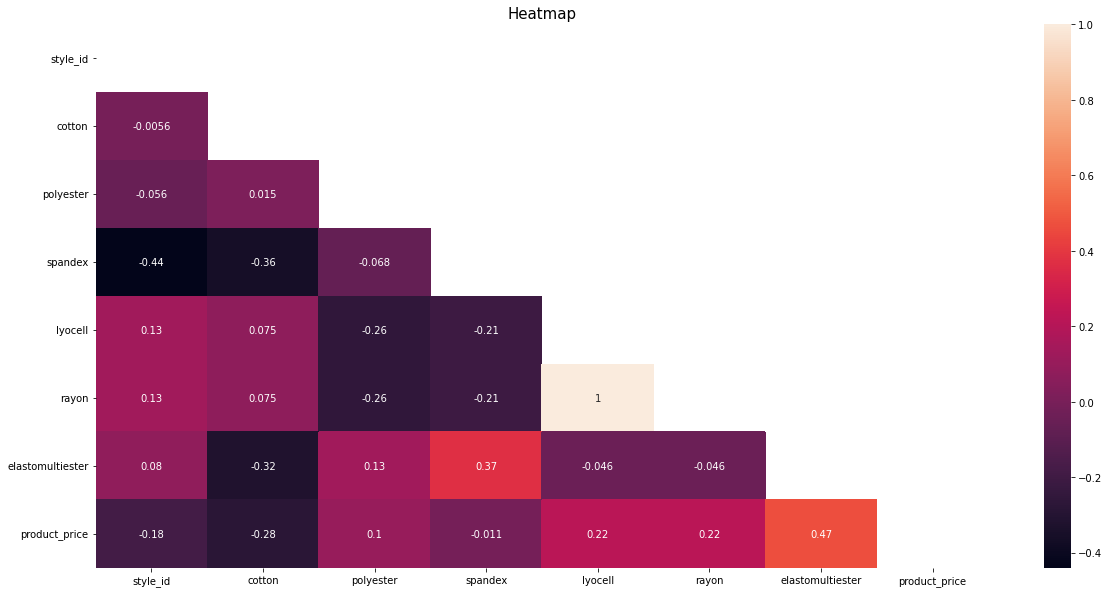

In [39]:
data_analysis = df.copy(deep=True)

corr = data_analysis.drop(columns='product_id').corr()
    
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
    
plt.figure(figsize=(20,10))
ax = sns.heatmap(corr, mask = mask, annot = True)
ax = plt.title("Heatmap", fontsize=15)
ax = plt.xlabel("",fontsize=12)
ax = plt.ylabel("",fontsize=12)

From the heatmap above, the features which most correlate with the price are:



1.   elastomultiester: 0.47.
2.   lyocell and rayon: 0.22.
3.   polyester: 0.1.

However, none of these features presented a good correlation based on the values from heatmap. The highest value was 0.47 and this is out of range to be a good correlation though. 

#### 2.1.1.2 True Religion

In [40]:
df02.head()

,product_id,product_name,product_price,scrape_datetime
0,194922694017,rocco_skinny_jean,49.0,2022-12-05 09:41:26
1,194922794977,ricky_straight_jean,49.0,2022-12-05 09:41:26
2,194922702125,geno_slim_jean,49.0,2022-12-05 09:41:26
3,194922694338,ricky_straight_jean,49.0,2022-12-05 09:41:26
4,194922795424,rocco_skinny_jean,49.0,2022-12-05 09:41:26


Since we do not use product_id and scrape_datetime for correlation analysis, because there is no sense, we did not perform this type of analysis for the True Religion dataset. That implies product_name as the most correlated feature with the price.

### 2.1.2. Continuous features analysis 

#### 2.1.2.1. H&M

In [41]:
fig = px.histogram(data_analysis, x= 'product_price', nbins = 80, color_discrete_sequence=['black'])
fig.update_layout(title="Number of products per price")
fig.update_xaxes(title="Price (USD)")
fig.update_yaxes(title="Absolute frequency (-)")
    
fig.show()

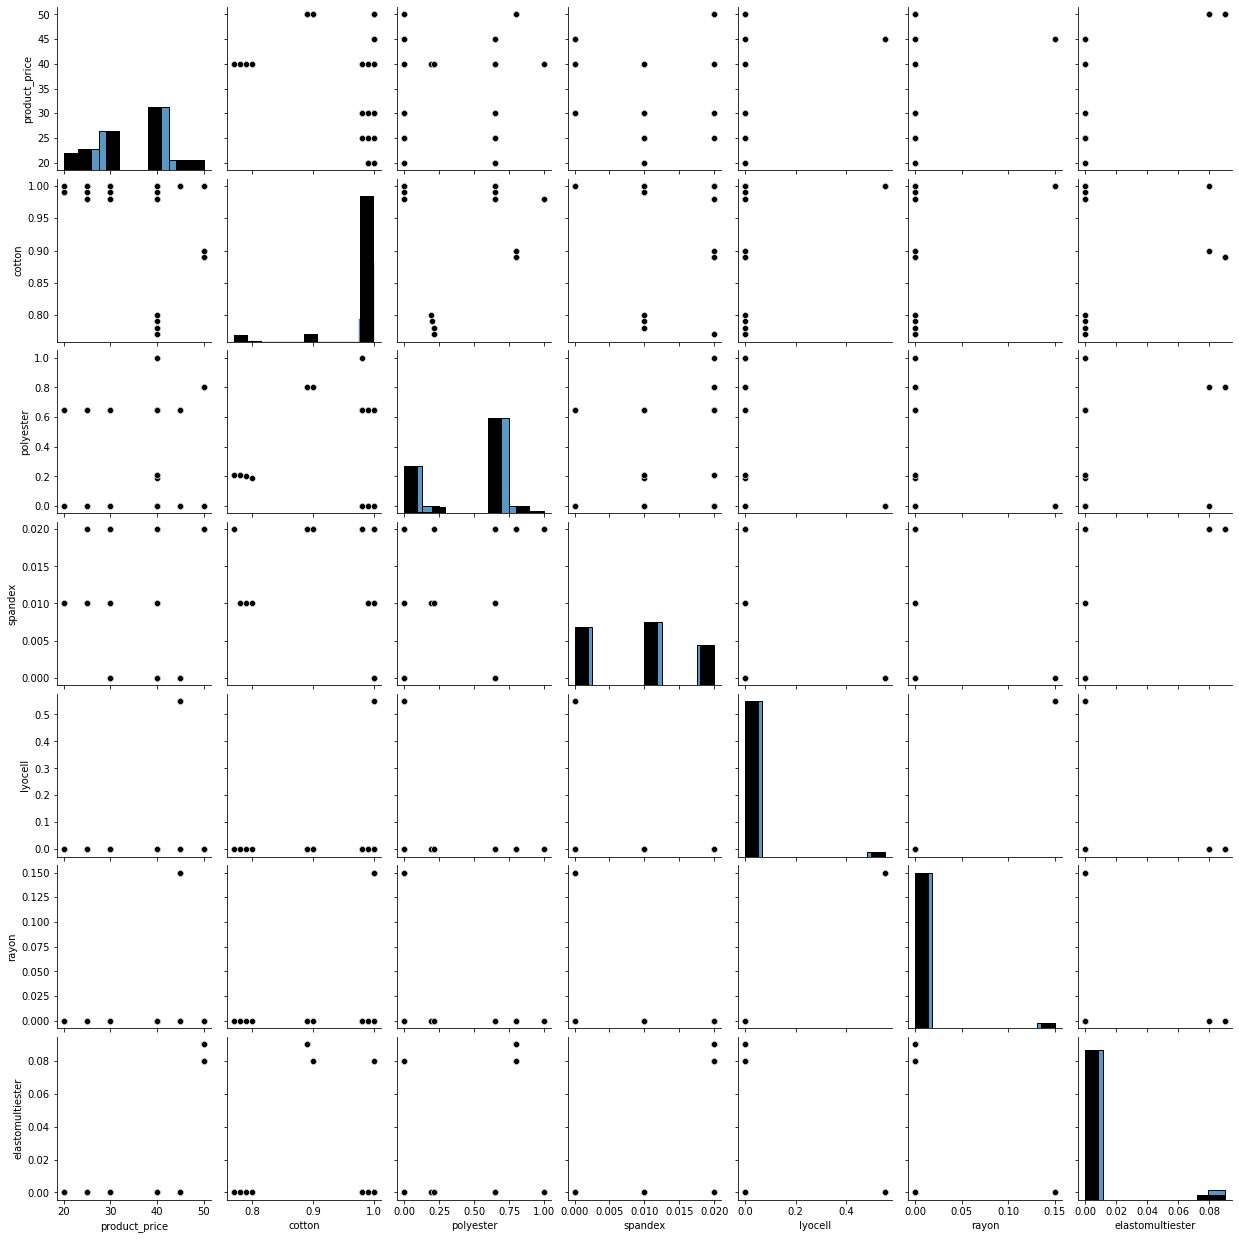

In [42]:
ax = sns.pairplot(data_analysis[['product_price', 'cotton','polyester','spandex','lyocell', 'rayon', 'elastomultiester']])
ax.map_upper(sns.scatterplot, color = 'black')
ax.map_lower(sns.scatterplot, color = 'black')
ax.map_diag(plt.hist, color = 'black')

Based on histogram:

- The most frequent price for H&M is USD 39.99. 
- The least frequent prices are the highest ones: USD 44.99 and USD 49.99.

Based on pairplot, we could not identify any correlation between the features. 

### 2.1.3. Discrete features analysis 

#### 2.1.3.1. H&M

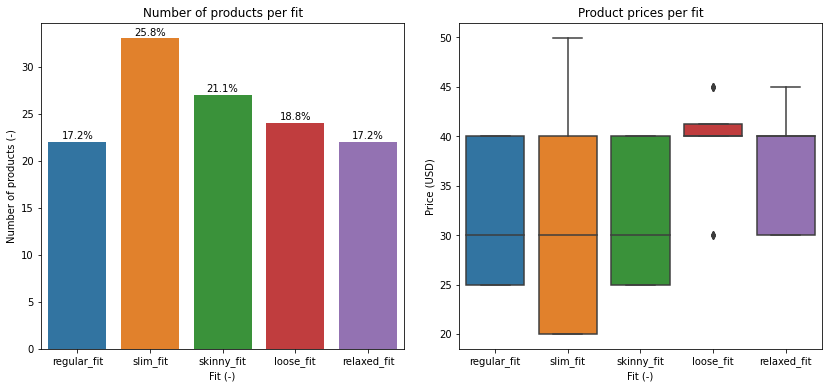

In [44]:
plt.figure(figsize = (14,6))

plt.subplot(121)
ax1 = sns.countplot(x = 'fit', data = data_analysis)
for p in ax1.patches:
  ax1.annotate(format(str((p.get_height()/len(data_analysis)*100).round(1)) + '%'), 
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha='center', 
                    va='center', 
                    xytext=(0,6),
                    textcoords='offset points')
ax1 = plt.title("Number of products per fit", fontsize=12)
ax1 = plt.xlabel("Fit (-)", fontsize=10)
ax1 = plt.ylabel("Number of products (-)", fontsize=10)
    
plt.subplot(122)
ax2 = sns.boxplot(x = 'fit', y = 'product_price', data = data_analysis)
ax2 = plt.title("Product prices per fit", fontsize=12)
ax2 = plt.xlabel("Fit (-)", fontsize=10)
ax2 = plt.ylabel("Price (USD)")
    
plt.subplots_adjust(wspace = 0.15)
plt.show()

As we may see, slim_fit and skinny_fit are the most available fits in the website. That may implies they are the ones most sold too. Thus, we may focus mainly on them. Additionally, slim_fit presented the widest range of price. That allows to set a better variability in price. 

loose_fit presented the majority of prices between USD 39.99 and USD 44.99 (check it out below). That's why we see a very short range of prices.

In [45]:
data_analysis[data_analysis['fit'] == 'loose_fit']

,product_id,fit,color,style_id,cotton,polyester,spandex,lyocell,rayon,elastomultiester,product_price
8,979945025,loose_fit,purple,979945,1.0,0.65,0.0,0.00,0.00,0.0,39.99
9,979945025,loose_fit,purple,979945,1.0,0.65,0.0,0.00,0.00,0.0,39.99
13,1099503001,loose_fit,denim_gray,1099503,1.0,0.65,0.0,0.00,0.00,0.0,39.99
14,1099503001,loose_fit,denim_gray,1099503,1.0,0.65,0.0,0.00,0.00,0.0,39.99
28,979945012,loose_fit,gray,979945,1.0,0.65,0.0,0.00,0.00,0.0,39.99
29,979945012,loose_fit,gray,979945,1.0,0.65,0.0,0.00,0.00,0.0,39.99
32,979945003,loose_fit,black,979945,1.0,0.65,0.0,0.00,0.00,0.0,39.99
33,979945003,loose_fit,black,979945,1.0,0.65,0.0,0.00,0.00,0.0,39.99
59,979945001,loose_fit,light_denim_blue,979945,1.0,0.65,0.0,0.00,0.00,0.0,39.99
60,979945001,loose_fit,light_denim_blue,979945,1.0,0.65,0.0,0.00,0.00,0.0,39.99


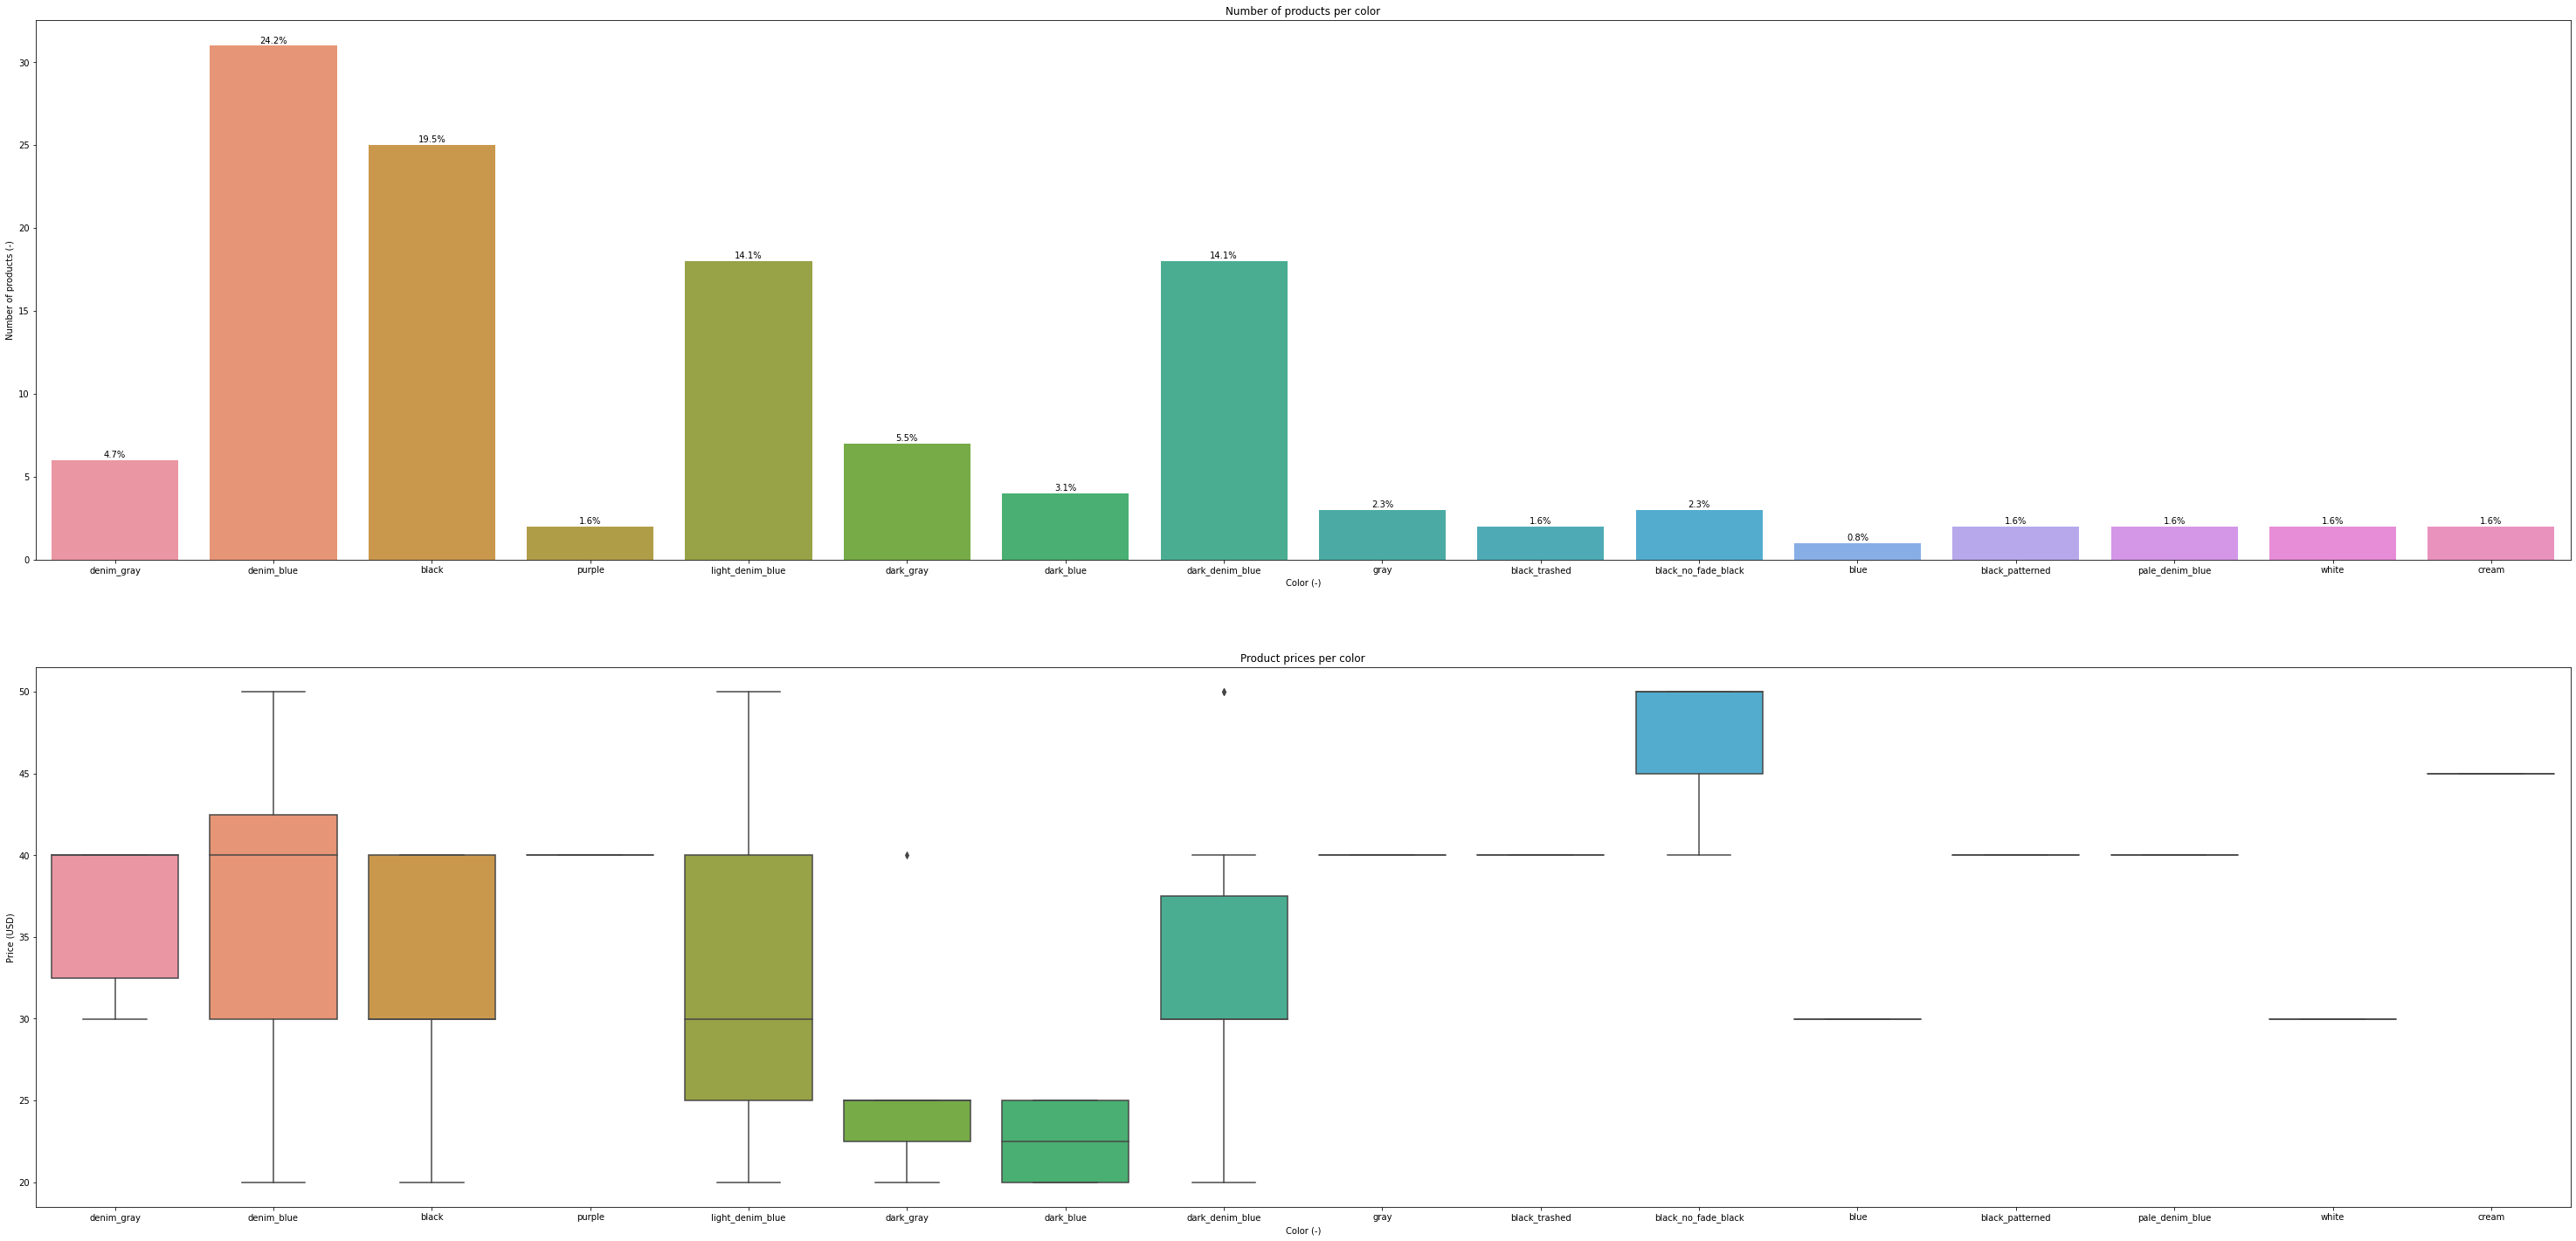

In [69]:
plt.figure(figsize = (52,25))

plt.subplot(211)
ax1 = sns.countplot(x = 'color', data = data_analysis)
for p in ax1.patches:
  ax1.annotate(format(str((p.get_height()/len(data_analysis)*100).round(1)) + '%'), 
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha='center', 
                    va='center', 
                    xytext=(0,6),
                    textcoords='offset points')
ax1 = plt.title("Number of products per color", fontsize=12)
ax1 = plt.xlabel("Color (-)", fontsize=10)
ax1 = plt.ylabel("Number of products (-)", fontsize=10)
    
plt.subplot(212)
ax2 = sns.boxplot(x = 'color', y = 'product_price', data = data_analysis)
ax2 = plt.title("Product prices per color", fontsize=12)
ax2 = plt.xlabel("Color (-)", fontsize=10)
ax2 = plt.ylabel("Price (USD)")
    
plt.subplots_adjust(wspace = 0.04)
plt.show()

In [46]:
df01_clean['color'].unique()

array(['denim_gray', 'denim_blue', 'black', 'purple', 'light_denim_blue',
       'dark_gray', 'dark_blue', 'dark_denim_blue', 'gray',
       'black_trashed', 'black_no_fade_black', 'blue', 'black_patterned',
       'pale_denim_blue', 'white', 'cream'], dtype=object)